In [1]:
# import the Python modules and packages required
import pandas as pd
import numpy as np
import io
import requests
import pprint
import matplotlib.pyplot as plt

In [2]:
# the freetrade file link
link = "https://docs.google.com/spreadsheets/d/14Ep-CmoqWxrMU8HshxthRcdRW8IsXvh3n2-ZHVCzqzQ/edit#gid=1855920257"
# split the link after /edit - keep just the first part
url_start = link.split('/edit')[0]
# add the sheet name
sheet_name = 'Freetrade Universe'
url_end = f"/gviz/tq?tqx=out:csv&sheet={sheet_name}"
# build the new link
url = url_start + url_end
# show the new url
url

'https://docs.google.com/spreadsheets/d/14Ep-CmoqWxrMU8HshxthRcdRW8IsXvh3n2-ZHVCzqzQ/gviz/tq?tqx=out:csv&sheet=Freetrade Universe'

In [3]:
# use python requests package to get the file
file = requests.get(url).content
# use python io to read the file into a pandas dataframe 
df = pd.read_csv(io.StringIO(file.decode('utf-8')))
# view the first 5 lines
df.head()

,Title,Long_Title,Subtitle,Currency,ISA_eligible,SIPP_eligible,ISIN,MIC,Symbol,Fractional_Enabled,...,for_Netherlands_investors,KIID_URL,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Endeavor,Endeavor Group Holdings Inc,Entertainment,usd,True,True,US29260Y1091,XNYS,EDR,True,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Confluent,Confluent Inc,Data management,usd,True,True,US20717M1036,XNAS,CFLT,True,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GitLab,GitLab Inc,Business platform,usd,True,True,US37637K1088,XNAS,GTLB,True,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Olaplex,Olaplex Holdings Inc,Haircare,usd,True,True,US6793691089,XNAS,OLPX,True,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,On,On Holding AG,Roger Federer's trainers,usd,True,True,CH1134540470,XNYS,ONON,True,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# how many shares are there to start with?
print('Number of shares available: ',len(df))

Number of shares available:  6364


In [5]:
# choose only the ISA eligible ones
df = df[df['ISA_eligible']==True]
# whats left?
print('Number of shares available: ',len(df))

Number of shares available:  5836


In [6]:
# deselect the Plus account only shares
df = df[df['PLUS_only']==False]
print('Number of shares available: ',len(df))

Number of shares available:  1392


In [7]:
# make sure they can be traded fractionally
df = df[df['Fractional_Enabled']==True]
print('Number of available: ',len(df))

Number of available:  475


In [8]:
# Copy to a new dataframe and keep only the useful columns
tradeable = df[['Title', 'Long_Title', 'Subtitle', 'Currency','ISIN', 'MIC', 'Symbol']].copy()

In [9]:
# import yfinance or install it first
try: 
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 635.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 3.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.5.1 which is incompatible.
apache-beam 2.40.0 requires pyarrow<8.0.0,>=0.15.1, but you have pyarrow 8.0.0 which is incompatible.


In [10]:
# drop the duplicates
tradeable.drop_duplicates(subset='Symbol', keep='first', inplace=True)

In [11]:
%timeit
# use yfinance to collect the data
share_data = yf.download(tradeable.Symbol.to_list(),
                         period="3mo", 
                         interval="1d", 
                         auto_adjust=True, 
                         back_adjust=True,
                         prepost=True)

[*****                 11%                       ]  53 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[********              16%                       ]  77 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[***********           23%                       ]  110 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[***************       32%                       ]  150 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[******************    37%                       ]  174 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[**********************46%                       ]  220 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[**********************56%**                     ]  265 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[**********************84%***************        ]  401 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[**********************90%******************     ]  429 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[**********************96%*********************  ]  454 of 475 completed

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


[*********************100%***********************]  475 of 475 completed

3 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- VER: No data found, symbol may be delisted
- IPOC: No data found, symbol may be delisted


In [12]:
# select just Apple from the multiindex to eyeball data
share_data.xs('AAPL', axis=1, level=1).head()

,Close,High,Low,Open,Volume
Date,,,,,
2022-09-30,137.971115,142.863009,137.771449,141.046016,124925300
2022-10-03,142.214081,142.833064,137.461969,137.981113,114311700
2022-10-04,145.858047,145.977844,144.021083,144.789812,87830100
2022-10-05,146.157532,147.135920,142.773147,143.831404,79471000
2022-10-06,145.189148,147.295654,144.979504,145.568524,68402200


In [13]:
# unquote line below to save all in GDrive/Colab Notebooks
share_data.to_csv('share_data.csv')

In [14]:
# select the close column for each ticker
data_close = share_data['Close']
# calculate the daily percentage change
data_returns = data_close.pct_change(1)
# eyeball the data 
data_returns.head()
# there are normally NaN in the first couple of rows

,A,AA,AAL,AAPL,ABB,ABBV,ABEV,ABNB,ABT,ACN,...,XOM,XPEV,YUM,Z,ZBRA,ZI,ZIM,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-03,0.041536,0.110814,-0.009967,0.030753,-0.053001,0.030624,0.098940,-0.000381,0.028524,0.029499,...,0.052800,-0.018410,0.026049,0.030409,0.038472,0.051608,0.031915,0.004756,0.037355,0.020635
2022-10-04,0.039801,0.075956,0.086409,0.025623,0.085597,0.026533,-0.003215,0.055333,0.035772,0.035562,...,0.036445,0.021313,0.021080,0.069539,0.035135,0.047249,0.059794,0.048688,0.032198,0.022464
2022-10-05,0.009360,-0.003728,-0.006178,0.002053,-0.012130,0.009437,-0.009677,0.008573,0.002910,0.000109,...,0.040412,-0.082638,0.008258,-0.049477,0.000817,0.018309,-0.024514,-0.000258,0.023580,-0.001034
2022-10-06,-0.003468,-0.005739,-0.010878,-0.006626,-0.016884,-0.021210,-0.006515,-0.001611,-0.008996,-0.017752,...,0.029661,-0.039126,-0.019674,0.017684,-0.005428,0.040668,-0.010770,0.010707,0.015376,-0.012937


In [15]:
# set the growth theshold
daily_growth_threshold = 0.9
# keep only the columns without a daily growth that big
data_returns = data_returns.loc[:, ~(data_returns >=daily_growth_threshold).any()]

In [16]:
# calculate the cumulative daily growth
data_cum_returns = (1 + data_returns).cumprod() -1

In [17]:
# take the last row
latest = data_cum_returns.tail(1).T.mul(100)
# label the column
latest.columns = ['% change']
# show the top ten
topten = round(latest.sort_values(by='% change', ascending=False)[:10], 2)
topten

,% change
HAL,60.36
CROX,57.92
BA,57.33
DB,55.68
BILI,54.63
MRNA,51.90
SLB,49.42
MUFG,48.22
CAT,46.98
ING,43.18


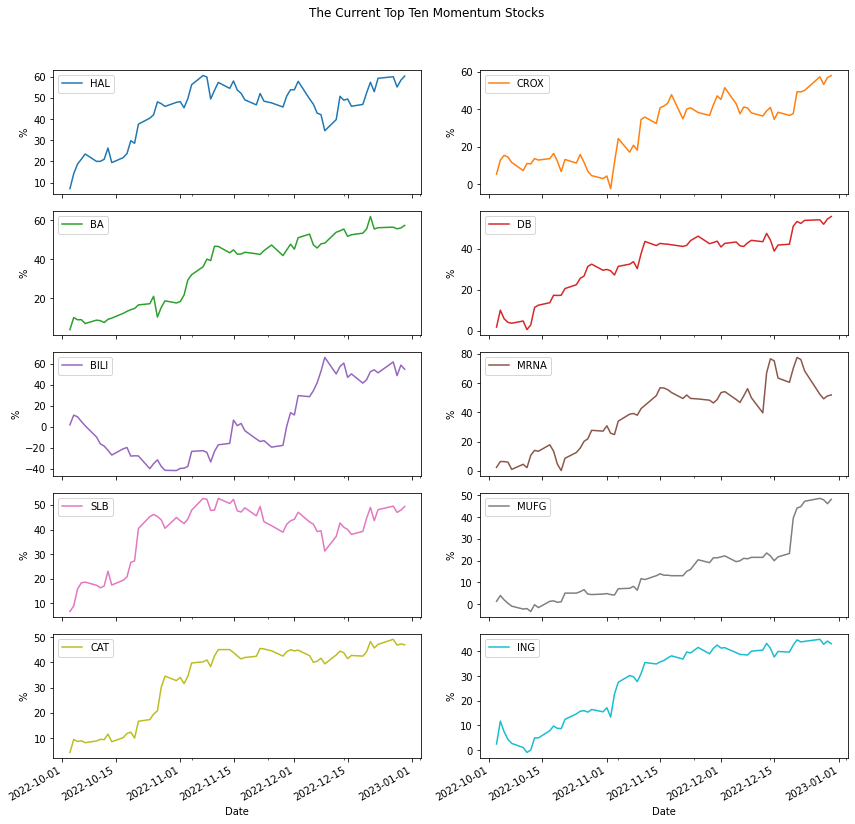

In [18]:
# plot the current top ten
data_cum_returns[list(topten.index)].mul(100).plot(subplots=True, 
                                          layout=(5, 2), 
                                          figsize=(12,12),
                                          sharex=True,
                                          ylabel='%',
                                          title='The Current Top Ten Momentum Stocks')
# tweek the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()